This notebook is about one result in [Nonlinear random matrix theory for deep learning by Pennington and Worach](https://papers.nips.cc/paper/6857-nonlinear-random-matrix-theory-for-deep-learning.pdf), 2017. 

## Problem Setting


We are primarily concerned with the distribution of the singular values of 

$$Y = f(W\cdot X), $$ 

where $W$ and $X$ are both $n$ by $n$ Gaussian random matrices ($W$ scaled by $1/\sqrt{n}$), and $f$ is an non-linear activiation function. 

## Main Theorem 

Let $\eta=E[f^2]$ and $\varsigma = E^2[f']$ with expectation taking over Gaussian measure. The Cauchy transform of the spectral density of $YY^T/n$ satisifies, 

$$
G(z) = \frac{1}{z}P\left(\frac{1}{z}\right), 
$$

where 

$$
P(t) = 1 + (\eta - \varsigma)tP^2(t) + \frac{P^2(t)\cdot t \varsigma}{1 - P^2(t)\cdot t \varsigma}.
$$

In particular, when $\varsigma=0$ and $\eta=1$, we can see that the Cauchy tranform $G(z)$ is

$$
zG^2(z) - zG(z) + 1 = 0, 
$$

which agrees with the Marcenko-Pastur law with shape parameter $r=m/n=1.$



In [60]:
using Plots, StatsBase
pyplot()

Plots.PyPlotBackend()

In [61]:
# simulate the output the l-layer random neural network with activation function f
function deep_net(n, l=1, f=(x)->x)
    
    X = randn(n, n)    
    W = randn(n, n) / sqrt(n)
    
    Y = f(W*X)    
    for i = 1:(l-1)
        Y = f(randn(n,n)*Y)
    end
    
    Y / sqrt(n) # / l
end

deep_net (generic function with 3 methods)

(Pennington and Worach, 2017) proposed the following piecewise linear activation function,


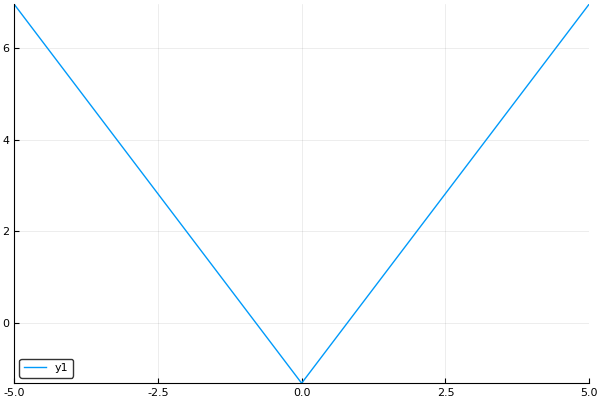

In [20]:
ff(x)=(abs.(x) - 2/sqrt.(2*pi)) ./sqrt(1 - 2/pi)

plot(-5:0.05:5, ff(collect(-5:0.05:5)))


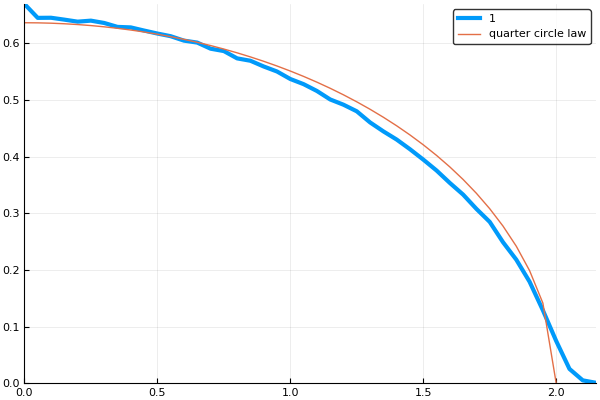

In [62]:
l = 1
bins = 0:0.05:2.2
h = Histogram(bins, :left);
for t = 1:4000
     append!(h, svdvals(deep_net(200, l, ff)))
end
w = h.weights
plot(collect(bins)[1:end-1], w/sum(w)/bins.step.hi, label=l, lw=3)
plot!(0:0.05:2, sqrt.(4 - collect(0:0.05:2).^2) / pi, label="quarter circle law")


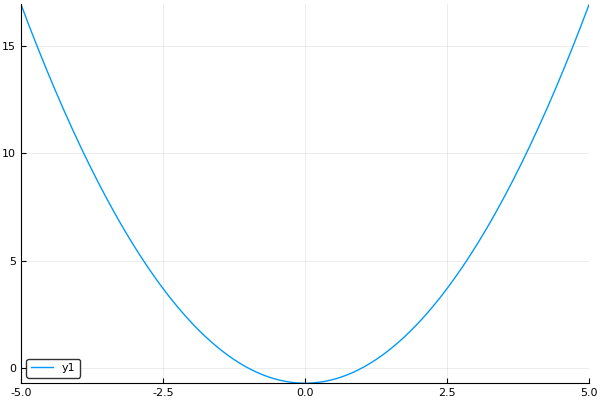

In [63]:
fs(x)=(x.^2-1)/sqrt(2)
fsp(x) = sqrt(2)*x

plot(-5:0.05:5, fs(collect(-5:0.05:5)))


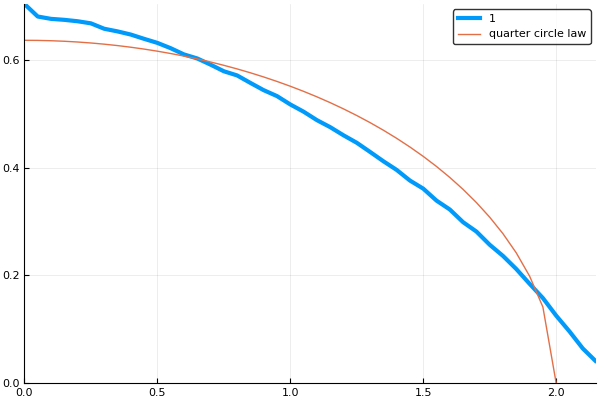

In [64]:
l = 1
bins = 0:0.05:2.2
h = Histogram(bins, :left);
for t = 1:4000
     append!(h, svdvals(deep_net(200, l, fs)))
end
w = h.weights
plot(collect(bins)[1:end-1], w/sum(w)/bins.step.hi, label=l, lw=3)
plot!(0:0.05:2, sqrt.(4 - collect(0:0.05:2).^2) / pi, label="quarter circle law")


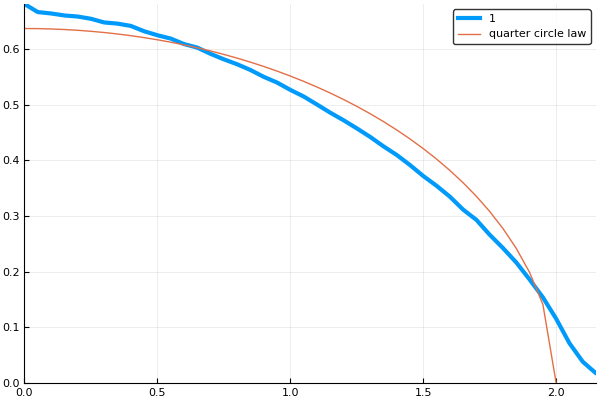

In [65]:
l = 1
bins = 0:0.05:2.2
h = Histogram(bins, :left);
for t = 1:4000
     append!(h, svdvals(deep_net(300, l, fs)))
end
w = h.weights
plot(collect(bins)[1:end-1], w/sum(w)/bins.step.hi, label=l, lw=3)
plot!(0:0.05:2, sqrt.(4 - collect(0:0.05:2).^2) / pi, label="quarter circle law")


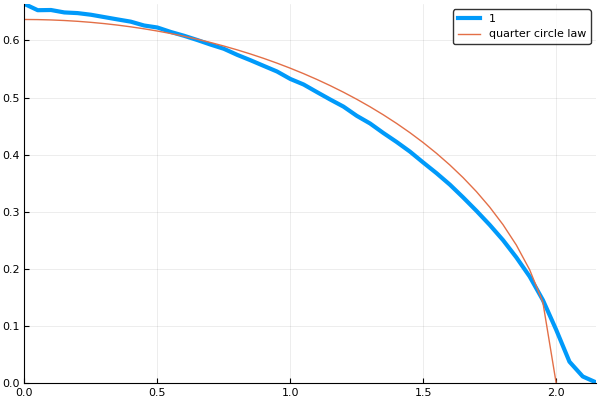

In [66]:
l = 1
bins = 0:0.05:2.2
h = Histogram(bins, :left);
for t = 1:4000
     append!(h, svdvals(deep_net(500, l, fs)))
end
w = h.weights
plot(collect(bins)[1:end-1], w/sum(w)/bins.step.hi, label=l, lw=3)
plot!(0:0.05:2, sqrt.(4 - collect(0:0.05:2).^2) / pi, label="quarter circle law")

## How about the smallest singular values (or condition number) ? 

### What observations can be drawn? 


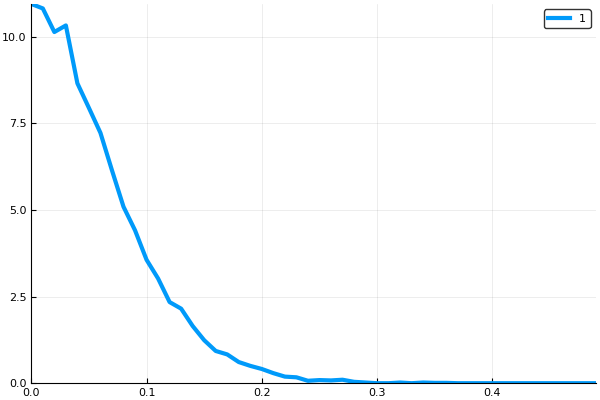

In [7]:
l = 1
bins = 0:0.01:0.5
h = Histogram(bins, :left);
for t = 1:10000
     append!(h, [minimum(svdvals(deep_net(20, l, fs)))])
end
w = h.weights
plot(collect(bins)[1:end-1], w/sum(w)/bins.step.hi, label=l, lw=3)


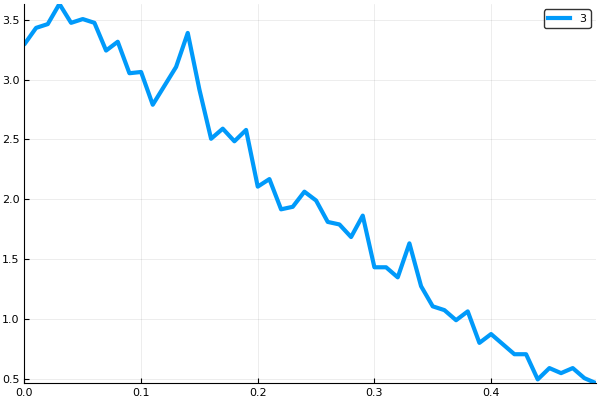

In [18]:
l = 3
bins = 0:0.01:0.5
h = Histogram(bins, :left);
for t = 1:10000
     append!(h, [minimum(svdvals(deep_net(20, l, ff)))])
end
w = h.weights
plot(collect(bins)[1:end-1], w/sum(w)/bins.step.hi, label=l, lw=3)


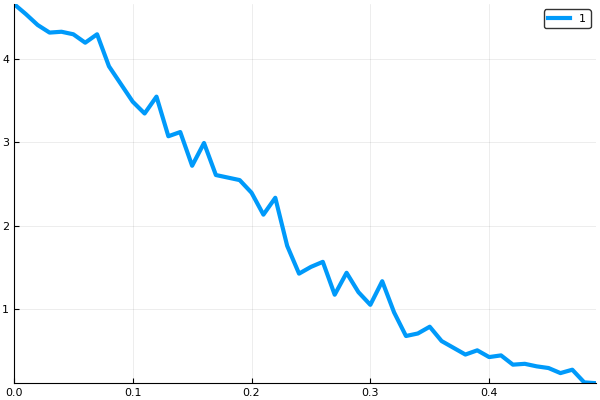

In [8]:
bins = 0:0.01:0.5
h = Histogram(bins, :left);
for t = 1:10000
     append!(h, [minimum(svdvals(randn(20,20)))])
end
w = h.weights
plot(collect(bins)[1:end-1], w/sum(w)/bins.step.hi, label=l, lw=3)